## GreyScale


In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [2]:
#JUPYTER VERSION
#comb_path = "../Data/Combined_Images"

#GOOGLE COLAB VERSION
from google.colab import drive
drive.mount('/content/drive')

# Unzipping the dataset file facial-age.zip

combined_images_path = "/content/drive/MyDrive/Combined_Images.zip"

with ZipFile(combined_images_path, 'r') as myzip:
    myzip.extractall()
    print('Done unzipping Combined_Images.zip')

comb_path = '../content/Combined_Images' 

Mounted at /content/drive
Done unzipping Combined_Images.zip


In [16]:
batch_size = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
  comb_path,
  validation_split=0.2,
  subset="training", #If should be return the training set (80%) or the validation set (20%)
  seed=41, #Seed should guarantee that train_ds and val_ds doesn't have common images
  shuffle=True,
  image_size=(200, 200),
  batch_size=batch_size,
  color_mode='grayscale')

val_ds = tf.keras.utils.image_dataset_from_directory(
  comb_path,
  validation_split=0.2,
  subset="validation",
  seed=41, 
  shuffle=True,
  image_size=(200, 200),
  batch_size=batch_size,
  color_mode='grayscale')

test_dataset = val_ds.take(53)
val_ds = val_ds.skip(53)

print('Batches for training -->', train_ds.cardinality())
print('Batches for validating -->', val_ds.cardinality())
print('Batches for testing -->', test_dataset.cardinality())

Found 33884 files belonging to 8 classes.
Using 27108 files for training.
Found 33884 files belonging to 8 classes.
Using 6776 files for validation.
Batches for training --> tf.Tensor(424, shape=(), dtype=int64)
Batches for validating --> tf.Tensor(53, shape=(), dtype=int64)
Batches for testing --> tf.Tensor(53, shape=(), dtype=int64)


In [4]:
model3 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(200, 200, 1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8, activation='softmax')
])

#model.compile(optimizer=tf.keras.optimizers.Adam(),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              #metrics=tf.keras.metrics.Accuracy())

#Additionaly, if you do not one-hot encode your data, set sparse_categorical_crossentropy as loss and sparse_categorical_accuracy as metric.
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# Defining the early stop to monitor the validation loss to avoid overfitting.
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

epochs=25
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  callbacks=[early_stop],
  epochs=epochs,
  shuffle=False
)

Epoch 1/25
424/424 [==============================] - 49s 89ms/step - loss: 2.0949 - sparse_categorical_accuracy: 0.2374 - val_loss: 1.9354 - val_sparse_categorical_accuracy: 0.2798
Epoch 2/25
424/424 [==============================] - 38s 89ms/step - loss: 1.8458 - sparse_categorical_accuracy: 0.2878 - val_loss: 1.8093 - val_sparse_categorical_accuracy: 0.2982
Epoch 3/25
424/424 [==============================] - 38s 89ms/step - loss: 1.7864 - sparse_categorical_accuracy: 0.3139 - val_loss: 1.7562 - val_sparse_categorical_accuracy: 0.3183
Epoch 4/25
424/424 [==============================] - 33s 77ms/step - loss: 1.7603 - sparse_categorical_accuracy: 0.3241 - val_loss: 1.7451 - val_sparse_categorical_accuracy: 0.3330
Epoch 5/25
424/424 [==============================] - 34s 79ms/step - loss: 1.7445 - sparse_categorical_accuracy: 0.3252 - val_loss: 1.7347 - val_sparse_categorical_accuracy: 0.3342
Epoch 6/25
424/424 [==============================] - 35s 83ms/step - loss: 1.7353 - spars

In [7]:
print("MODEL 3 --- GrayScale Images")
model3.evaluate(val_ds)

MODEL 3 --- GrayScale Images
53/53 [==============================] - 7s 56ms/step - loss: 1.7265 - sparse_categorical_accuracy: 0.3339


[1.726535677909851, 0.3339243531227112]

In [17]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Dire che le immagini colorate quinid non danno un gran chè perchè la performance rimane uguale ma aumenta l'overfitting

## Data Augmentation

TypeError: ignored

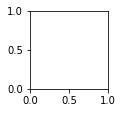

In [28]:
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(64):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("float32"))
        plt.title(class_names[labels[i]])
        plt.axis("off")